In [5]:
# Atėjo metas sujungti visas žinias į vieną vietą, tam pasitelksime didesnės apimties užduotį:

# Parsisiųskite šį dataset: https://archive.ics.uci.edu/dataset/109/wine (galite rinktis ir bet kurį kitą, jus dominantį dataset)

# atlikite žemiau nurodytus žingsnius:

# Žingsniai:

# Duomenų užkrovimas ir paruošimas
# Klasterizavimas 
# 2.1. Hierarchinis klasterizavimas 
# 2.2. K-vidurkių klasterizavimas 
# 2.3. DBSCAN klasterizavimas
# Klasifikavimas 
# 3.1. Decision Trees 
# 3.2. Random Forests 
# 3.3. Naive Bayes 
# 3.4. Regresija 
# 3.5. Linijinė regresija 
# 3.6. Polinominė regresija
# Modelio vertinimas 
# 4.1. Tikslumas, jautrumas, specifiškumas 
# 4.2. ROC ir AUC analizė
# Hiperparametrų optimizavimas 
# 5.1. Grid Search
# Modelių interpretavimas
# Atlikus visus šiuos punktus aprašykite išvadą: kokie žingsniai buvo atlikti paruošiant duomenis,
# kuris klasterizavimo metodas buvo labiausiai tinkamas ir dėl kokių priežasčių, kuris klasifikavimo
# metodas buvo tinkamiausias, ką sužinote iš modelio vertinimo, kokie hiperparametrai yra geriausi? 
# Taip pat pritaikykite modelio interpretavimą keliems įrašams (pavieniui) argumentuotai atsakykite
# kodėl vienas įrašas yra klasifikuojamas yra būtent prie tam tikros klasės.

import pandas as pd

columns = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 
           'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 
           'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']

wine_data = pd.read_csv('wine.data.csv', header=None, names=columns)
print(wine_data.head())

   Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280_OD315  Proline  
0             5.64  1.04         3.92     1065  
1             4.38  1.05         3.40     1050  
2          

In [6]:
# Trūkstamų reikšmių patikrinimas
print(wine_data.isnull().sum())

# Duomenų standartizavimas
from sklearn.preprocessing import StandardScaler

features = wine_data.columns[1:]
scaler = StandardScaler()
wine_data[features] = scaler.fit_transform(wine_data[features])
print(wine_data.head())


Class                   0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280_OD315             0
Proline                 0
dtype: int64
   Class   Alcohol  Malic_acid       Ash  Alcalinity_of_ash  Magnesium  \
0      1  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1      1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2      1  0.196879    0.021231  1.109334          -0.268738   0.088358   
3      1  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4      1  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629        

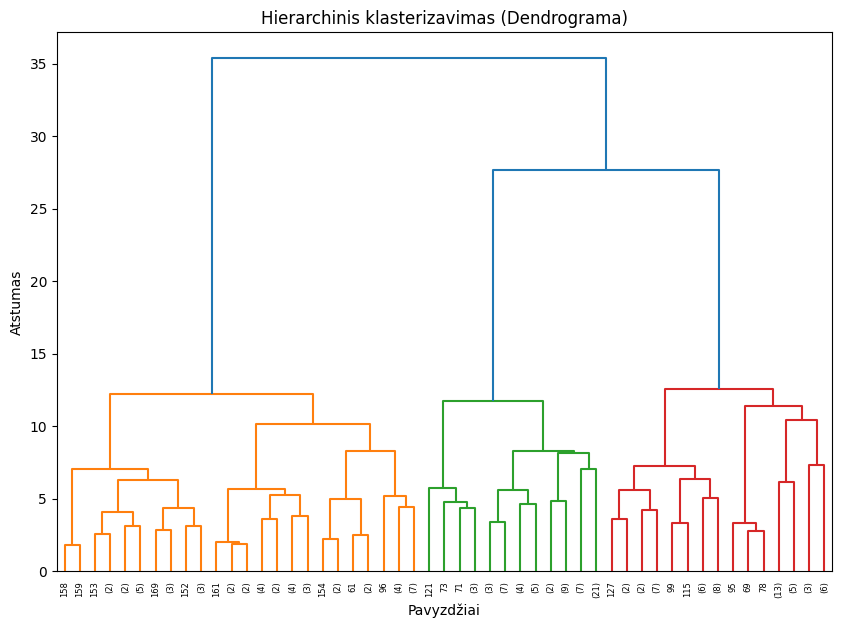

In [7]:
# KLASTERIZAVIMAS
# 2.1. Hierarchinis klasterizavimas

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Hierarchinio klasterizavimo atlikimas
Z = linkage(wine_data[features], method='ward')

# Dendrogramos braižymas
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchinis klasterizavimas (Dendrograma)')
plt.xlabel('Pavyzdžiai')
plt.ylabel('Atstumas')
plt.show()


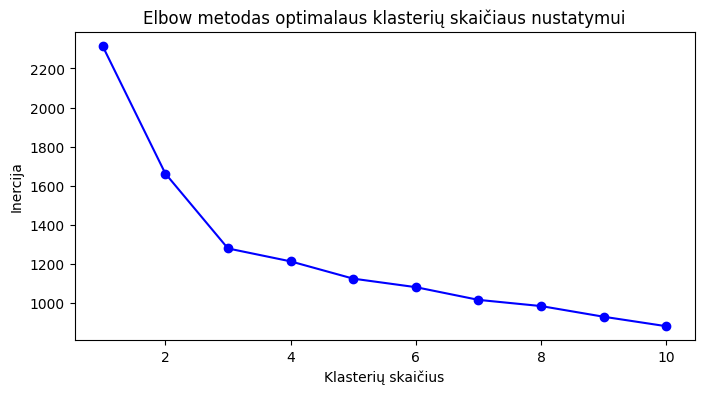

In [8]:
# 2.2. K-vidurkių klasterizavimas

from sklearn.cluster import KMeans
import numpy as np

# Optimalaus klasterių skaičiaus nustatymas naudojant Elbow metodą
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wine_data[features])
    inertia.append(kmeans.inertia_)

# Elbow metodo vizualizacija
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Klasterių skaičius')
plt.ylabel('Inercija')
plt.title('Elbow metodas optimalaus klasterių skaičiaus nustatymui')
plt.show()

# K-vidurkių klasterizavimas su optimaliu klasterių skaičiumi (pvz. 3)
kmeans = KMeans(n_clusters=3, random_state=42)
wine_data['KMeans_Labels'] = kmeans.fit_predict(wine_data[features])


In [9]:
# 2.3. DBSCAN 

from sklearn.cluster import DBSCAN

# DBSCAN klasterizavimas
dbscan = DBSCAN(eps=0.5, min_samples=5)
wine_data['DBSCAN_Labels'] = dbscan.fit_predict(wine_data[features])

# Klasterių etikečių skaičius
print(wine_data['DBSCAN_Labels'].value_counts())


DBSCAN_Labels
-1    178
Name: count, dtype: int64


In [10]:
# 3: Klasifikavimas
# 3.1. Decision Trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Duomenų dalijimas į mokymo ir testavimo rinkinius
X = wine_data[features]
y = wine_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree klasifikatoriaus mokymas
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Prognozavimas ir tikslumo vertinimas
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree tikslumas: {accuracy_dt}')


Decision Tree tikslumas: 0.9629629629629629


In [11]:
# 3.2. Random Forests

from sklearn.ensemble import RandomForestClassifier

# Random Forest klasifikatoriaus mokymas
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Prognozavimas ir tikslumo vertinimas
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest tikslumas: {accuracy_rf}')


Random Forest tikslumas: 1.0


In [12]:
# 3.3. Naive Bayes

from sklearn.naive_bayes import GaussianNB

# Naive Bayes klasifikatoriaus mokymas
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Prognozavimas ir tikslumo vertinimas
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes tikslumas: {accuracy_nb}')


Naive Bayes tikslumas: 1.0


In [13]:
# 3.4. Logistinė regresija

from sklearn.linear_model import LogisticRegression

# Logistinės regresijos klasifikatoriaus mokymas
lr_classifier = LogisticRegression(random_state=42, max_iter=10000)
lr_classifier.fit(X_train, y_train)

# Prognozavimas ir tikslumo vertinimas
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistinės regresijos tikslumas: {accuracy_lr}')


Logistinės regresijos tikslumas: 0.9814814814814815


In [14]:
# 3.5. Linijinė regresija

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linijinės regresijos modelio mokymas
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prognozavimas ir MSE vertinimas
y_pred_lin_reg = lin_reg.predict(X_test)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
print(f'Linijinės regresijos MSE: {mse_lin_reg}')


Linijinės regresijos MSE: 0.05978606241082406


In [15]:
# 3.6. Polinominė regresija

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polinominės regresijos modelio mokymas (laipsnis = 2)
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

# Prognozavimas ir MSE vertinimas
y_pred_poly_reg = poly_reg.predict(X_test)
mse_poly_reg = mean_squared_error(y_test, y_pred_poly_reg)
print(f'Polinominės regresijos MSE: {mse_poly_reg}')


Polinominės regresijos MSE: 4.8583032113534435


In [16]:
# 4: Modelio vertinimas
# 4.1. Tikslumas, jautrumas, specifiškumas

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Tikslumo, jautrumo, specifikumo skaičiavimas (Decision Tree pavyzdyje)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

print(f'Tikslumas: {precision}')
print(f'Jautrumas: {recall}')
print(f'F1-score: {f1}')


Tikslumas: 0.9638047138047138
Jautrumas: 0.9629629629629629
F1-score: 0.9628353590455226


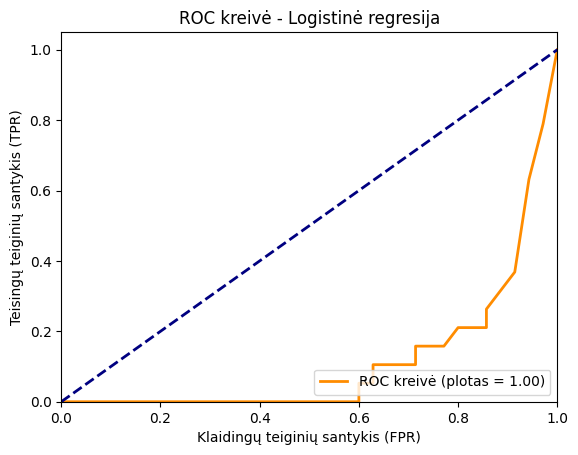

In [18]:
# 4.2. ROC ir AUC analizė

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ROC ir AUC analizė (Random Forest pavyzdyje)
y_prob_rf = rf_classifier.predict_proba(X_test)

# Tik ROC kreivės ir AUC pavyzdys vienai klasei (klasė 1)
fpr, tpr, _ = roc_curve(y_test, y_prob_rf[:, 1], pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_rf, multi_class='ovr')

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC kreivė (plotas = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Klaidingų teiginių santykis (FPR)')
plt.ylabel('Teisingų teiginių santykis (TPR)')
plt.title('ROC kreivė - Logistinė regresija')
plt.legend(loc="lower right")
plt.show()
